# Problem 1:

We construct the fourier matrix of size N with dimensions $k, \ell$.

We are given $\omega=\mathrm{exp}(2\pi i/N)$. Each index of the fourier matrix will be of the form: $1/\sqrt(N) * \omega^{(k*l)}$

Note that in numpy, 1j represents the imaginary $i$

In [5]:
import numpy as np
from numpy import linalg

def get_fourier_matrix(N):
    fourier = []
    omega = np.exp(2*np.pi*1j/N)
    
    for l in range(N): 
        row = []
        for k in range(N):
            row.append(omega**(k*l))
        
        fourier.append(row)
        
    return np.matrix(fourier) * (1/np.sqrt(N))

print("Fourier matrix when N=3:")
print(get_fourier_matrix(3))

Fourier matrix when N=3:
[[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]]


Above, we produce the matrix one row at a time, and append each row to a matrix. 

Next we will test the code in the following ways:

# 1) the Fourier matrix is unitary
Using this resource: https://stackoverflow.com/questions/34997244/is-there-a-way-in-numpy-to-test-whether-a-matrix-is-unitary
we contruct a simple is_unitary() method. Additionaly, we write a test function that tests if the resulting matrix is unitary for all values of N up to 50. We can see that the result is that the test is passed. 

In [0]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.H * m)

def unitary_test():
  for i in range(1,50):
    if (not is_unitary(get_fourier_matrix(i))):
      return False
    return True

print("Result of unitary test:")
print(unitary_test())

Result of unitary test:
True


# The fourth power of $F_N^4$ is equal to the identity matrix

In python, we can create the identity matrix using np.eye(). Additionally, np.allclose checks each element of two matricies and checks if their values are equal. We use these two functions to check if $F_N^4$ is equal to the identity matrix for values of N up to 50. 

In [0]:
def identity_test():
  for i in range(1,50):
    fourier = get_fourier_matrix(i)
    M = linalg.matrix_power(fourier, 4)
    if (not np.allclose(np.eye(i), M)):
      return False
    return True

print("Result of identity test:")
print(identity_test())

Result of identity test:
True


# Its eigenvalues are $1, i, -1, -i$
As mentioned on the linked wikipedia article, the eigenvalues of $U$  are the fourth roots of unity. This means that the eigenvalues raised to the fourth power should equal 1. Here we write another test that checks for all values of N up to 50 that the former is true. 

In [0]:
def eigen_test():
  for i in range(1,50):
    values, vectors = linalg.eig(get_fourier_matrix(i)) 
    if (not (np.allclose(values**4, 1))):
      return False
    return True

print("Result of test of eigenvalues:")
print(eigen_test())

Result of test of eigenvalues:
True


# Cyclic Shift Matrix

Given an N sized matrix with dimensions $k, \ell$, the cyclic shift matrix is defined such that each element is either 0 or 1 based on the following boolean expression:


0 if  $\ell \neq (k+1) \% N$.

Below, we provide our function that generates this matrix:



In [6]:
def get_cyclic_shift_matrix(N):
    shift = []
    
    for k in range(N): 
        row = []
        for l in range(N):
          if l != (k+1) % N:
            row.append(0)
          else:
            row.append(1)
        shift.append(row)
        
    return np.matrix(shift)

print("Cyclic shift matrix when N=3:")
print(get_cyclic_shift_matrix(3))

Cyclic shift matrix when N=3:
[[0 1 0]
 [0 0 1]
 [1 0 0]]


We repeat each of the tests on this new matrix.

#The cyclic shift matrix is unitary

In [0]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.H * m)

def unitary_test():
  for i in range(1,50):
    if (not is_unitary(get_cyclic_shift_matrix(i))):
      return False
    return True

print("Result of unitary test:")
print(unitary_test())

Result of unitary test:
True


#The $N$th power of the cyclic shift matrix is the identity matrix

In this code snippet, we test $P_N^k = I$, where $N,k \in [1,50]$

In [0]:
def identity_test():
  for i in range(1,50):
    shift = get_cyclic_shift_matrix(i)

    for k in range(1,50):
      M = linalg.matrix_power(shift, k)
      if (not np.allclose(np.eye(i), M)):
        return False
    return True

print("Result of identity test:")
print(identity_test())

Result of identity test:
True


#The eigenvalues of the cyclic shift matrix are $N$th roots of unity

In [0]:
def eigen_test():
  for i in range(1,50):
    values, vectors = linalg.eig(get_cyclic_shift_matrix(i)) 
    if (not (np.allclose(values**4, 1))):
      return False
    return True

print("Result of test of eigenvalues:")
print(eigen_test())

Result of test of eigenvalues:
True


#The cyclic shift matrix is diagonalized by the Fourier matrix, that is, $F_N^\dagger P_N F_N$ is diagonal.

For this test, we can simply take the dot product of each of the matrices and check if the result is diagonal. To get $F_N^\dagger$ we use the linalg.dia method. 

In [14]:
def diag_test():
  for i in range(1,50):
    shift = get_cyclic_shift_matrix(i)
    fourier = get_fourier_matrix(i)
    fourier_dag = np.diag(fourier)

    dot = fourier_dag * fourier * shift
    if not np.allclose(np.diag(np.diag(dot)), dot):
      return False
    return True

print("Result of diagonal test:")
print(diag_test())

Result of diagonal test:
True


# Quantum Phase Estimation Circuit

As per this page: https://qiskit.org/documentation/install.html 
we must use qiskit-terra instead of regular qiskit in collab, other we get errors. 

In [0]:
!pip install qiskit-terra[visualization]

Running the following cell will verify that qiskit is working, if it does not work, uncomment and run the above cell.

In [0]:
import qiskit
import numpy as np
from qiskit.visualization import plot_histogram

qiskit.__version__

'0.13.0'

To begin, we initialize our system with 4 qubits. 3 Of the qubits will make up our "upper qubits" and the last will be $|\psi>$. We apply an x gate to $|\psi>$ to set its value to $|1>$. For each of the upper qubits, we apply a hadamard gate to put these qubits into superposition.  

In [0]:
qpe = qiskit.QuantumCircuit(4,3)
psi = 2*np.pi*(32/256)

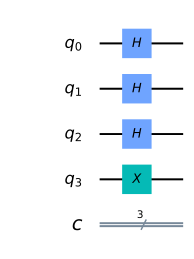

In [0]:
def hadamard_gates(qpe):

  #Apply hadamard gates
  qpe.h(0)
  qpe.h(1)
  qpe.h(2)

  #Apply x gate
  qpe.x(3)

  return qpe

#Draw the circuit so far
qpe = hadamard_gates(qpe)
qpe.draw(output='mpl')

Next, we must apply controlled U gates to each of the upper bits. Since we have 3 bits, we know our U gates will be $U^{2^k}$ where $k \in [0,2]$. In qiskit, we must repeat the U circuits $2^k$ times in order to achieve the effect of $U^{2^k}$. At this point in the circuit, we have applied phase kickback from the controlled U gates. 

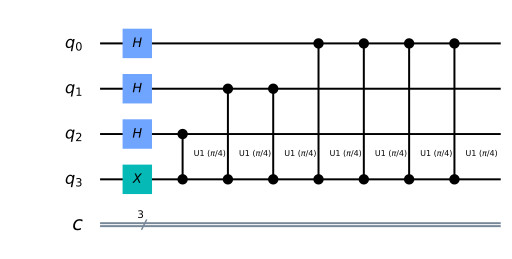

In [0]:
def phase_kickback(qpe, psi):
  #Qubit 0
  qpe.cu1(psi, 2, 3)

  #Qubit 1
  qpe.cu1(psi, 1, 3)
  qpe.cu1(psi, 1, 3)

  #Qubit 2
  qpe.cu1(psi, 0, 3)
  qpe.cu1(psi, 0, 3)
  qpe.cu1(psi, 0, 3)
  qpe.cu1(psi, 0, 3)

  return qpe

#Apply phase kickback and draw circuit
qpe = phase_kickback(qpe, 2*np.pi*(32/256))
qpe.draw(output='mpl')

Next we must apply the inverse fourier transform to control qubits. We create an inverse fourier transform function which generates this gate so that we can add it to our overall circuit. 

Based on the inverse fourier gate provided by the slides, we only need a way to get $R_2^\dagger$ and $R_3^\dagger$.

From the slides, we know that phase shift $R_k$ is defined as follows:
\begin{bmatrix} 
    1      & 0  \\
    0      & e^{2\pi i/2^k}  \\
\end{bmatrix}

Thus, $R_K^\dagger$ is:
\begin{bmatrix} 
    1      & 0  \\
    0      & e^{-2\pi i/2^k}  \\
\end{bmatrix}

In qiskit, we can realize this by using a controlled u gate with the input: $e^{-2\pi i/2^k}$. 


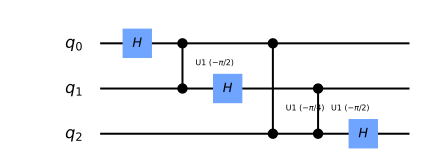

In [0]:
def inverse_fourier_transform(qpe):
  #Qubit 0
  qpe.h(0)

  #Qubit 1
  qpe.cu1(-2*np.pi/(2**2), 0,1)
  qpe.h(1)

  #Qubit 2
  qpe.cu1(-2*np.pi/(2**3), 0,2)
  qpe.cu1(-2*np.pi/(2**2), 1,2)
  qpe.h(2)

  return qpe

#Draw our inverse fourier transform gate
ift = inverse_fourier_transform(qiskit.QuantumCircuit(3))
ift.draw(output='mpl')

Pictured above is our inverse fourier transform gate. Again, we get the design from the lecture slides (https://github.com/schneider128k/quantum_computing_slides/blob/master/quantum_computing_slides.pdf). This concludes our circuit. The only remaining task is to perform measurement on each of the 3 qubits. 

As mentioned in the qiskit documentation and some tutorials (https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html), it is necessary to put a barrier between gates in your circuits in order to ensure that qiskit does not re-order computation in a way that alters the intended measurements of your circuit. We do so in a test function, which generates our entire circuit in addition to taking measurements. 


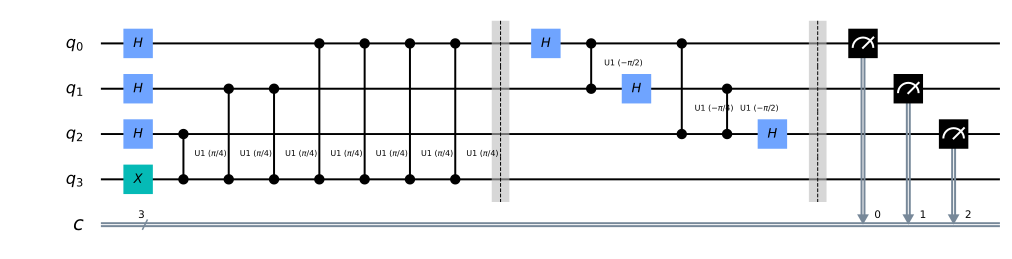

In [0]:
def test_value(psi):
  qpe = qiskit.QuantumCircuit(4,3)

  #Build circuit using the functions we have so far
  qpe = hadamard_gates(qpe)
  qpe = phase_kickback(qpe, psi)
  qpe.barrier()
  qpe = inverse_fourier_transform(qpe)
  qpe.barrier()

  #Place measurements
  qpe.measure(0,0)
  qpe.measure(1,1)
  qpe.measure(2,2)

  #Run simulations on the circuit
  backend = qiskit.BasicAer.get_backend('qasm_simulator')
  data = qiskit.execute(qpe, backend=backend, shots=2048).result()

  return qpe, data

qpe, data = test_value(2*np.pi*(32/256))
qpe.draw(output='mpl')


Pictured above is our full circuit. 

#Tests
To test our algorithm, we rerun some of the test from the slides. 


#$\psi$ = 32/256:

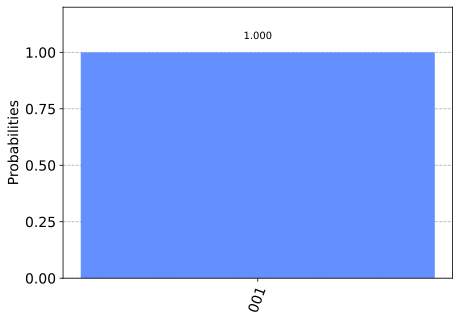

In [0]:
qpe, data = test_value(2*np.pi*(32/256))
plot_histogram(data.get_counts())

#$\psi$ = 33/256:

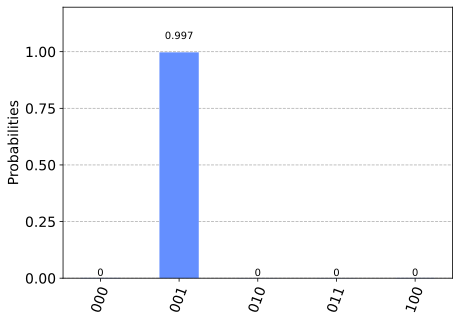

In [0]:
qpe, data = test_value(2*np.pi*(33/256))
plot_histogram(data.get_counts())

#$\psi$ = 34/256:

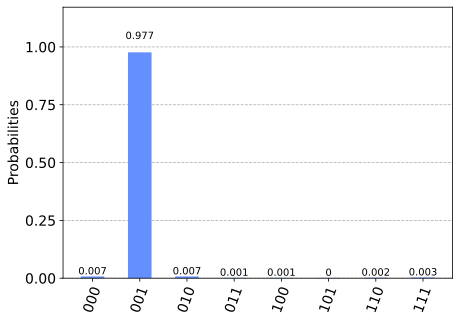

In [0]:
qpe, data = test_value(2*np.pi*(34/256))
plot_histogram(data.get_counts())

#$\psi$ = 35/256:

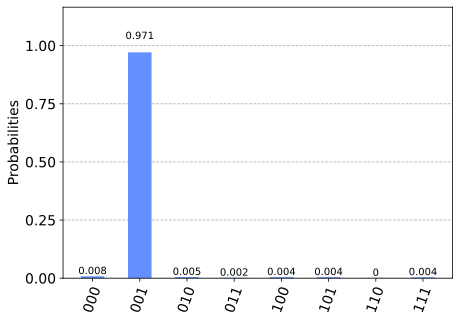

In [0]:
qpe, data = test_value(2*np.pi*(35/256))
plot_histogram(data.get_counts())

We see that our algorithm reports with pretty high confidence that $\psi$ = $($binary $ 001)/2^n = 1/8 = 32/256$. This is precicesly the answer we expect. 

If we try $\psi = 65/256$, we should expect to see a high probability in the binary 010 column, as $65/256$ is very close to $2/8$. 

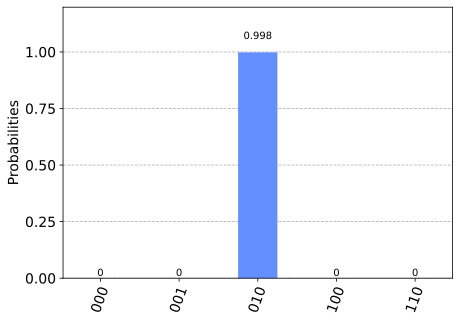

In [0]:
qpe, data = test_value(2*np.pi*(65/256))
plot_histogram(data.get_counts())

The above test meets our expectations. We can reason that our circuit is working correctly. 